## 3. Árboles de Decisión en Scikit-Learn + *train/test split*

Nuevamente, vamos a trabajar con el dataset del Titanic. La consigna consiste en entrenar los mismos modelos de la clase 15 (en el sentido de usar el mismo preprocesamiento y los mismos atributos), pero separando los conjuntos de Train y Test. Además, evaluar los modelos en esos conjuntos. Entonces: reciclar el código del Notebook de la clase anterior y agregar un `train_test_split`, predecir sobre `X_train` y `X_test` y evaluar el desempeño de los modelos sobre esos conjuntos. Dejamos el *esqueleto* de algunas celdas que les pueden servir. 

Una vez que obtengan los desempeños sobre cada set y modelo, modificar el parámetro `max_depth` del `DecisionTreeClassifier` y volver a entrenar y evaluar. Prestar atención a las diferencias de desempeño en cada conjunto. ¿Qué está ocurriendo?

In [20]:
import pandas as pd

In [21]:
# Importamos el Dataset
df = pd.read_csv('DS_Encuentro_05_titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [22]:
df.drop(['Cabin','PassengerId','Name','Ticket','Embarked'], axis=1,inplace=True)

In [23]:
df.dropna(inplace = True)

In [24]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

### Entrenamiento del Modelo y evaluación


In [25]:
from sklearn.tree import DecisionTreeClassifier

# Creamos un objeto arbol
tree = DecisionTreeClassifier()

**Primer Modelo**

In [26]:
X = df[['Pclass','Sex']]
y = df['Survived']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.80, random_state=42)

In [28]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.7746478873239436
Accuracy sobre conjunto de Test: 0.7954545454545454


**Segundo Modelo**

In [29]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [31]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [32]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

# Comaparamos con las etiquetas reales
print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9937238493723849
Accuracy sobre conjunto de Test: 0.7542372881355932


## 4. Iris Dataset

Entrenar un `DecisionTreeClassifier` sobre el Iris Dataset. Dejamos algunas consignas de guía.

**Ejercicio**: importar los datos, descartar las columnas que no agreguen información y hacer una `pairplot`

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
sns.set()

In [34]:
iris = pd.read_csv('DS_Clase_04_iris.csv')
iris = iris.drop("Id", axis=1)
iris.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


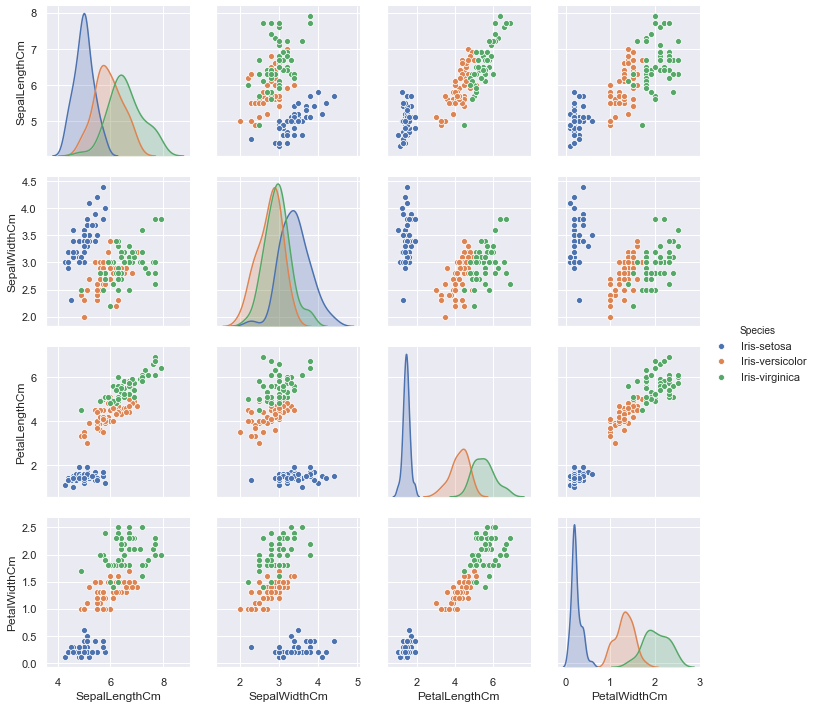

In [35]:
sns.pairplot(iris, hue="Species")
plt.show()

**Para pensar**: ¿Son separables las especies?¿Cuáles serán más fáciles de separar?¿Con qué atributos?

**Ejercicio**: separar del dataframe los features y las etiquetas. Llamar `X` a los features e `y` a las etiquetas. Elegir qué features usar (pueden ser todos). Fijarse si es necesario transformar las etiquetas o si Scikit-Learn puede trabajar con ellas.

In [36]:
X = iris.drop("Species", axis=1)
y = iris.Species

In [37]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

**Ejercicio**: separar en conjuntos de Train y Test

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**Ejercicio**: importar un DecisionTreeClassifier de Scikit-Learn

In [40]:
from sklearn.tree import DecisionTreeClassifier

**Ejercicio**: crear un DecisionTreeClassifier con max_depth = 2.

In [41]:
tree = DecisionTreeClassifier(max_depth = 2)

**Ejercicio**: entrenar el DecisionTreeClassifier que crearon.

In [42]:
tree.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Ejercicio**: explorar algunas características del modelo entrenado.

In [43]:
# print(tree.classes_)
# print(tree.n_classes_)
# print(tree.max_features_)
# print(tree.feature_importances_)

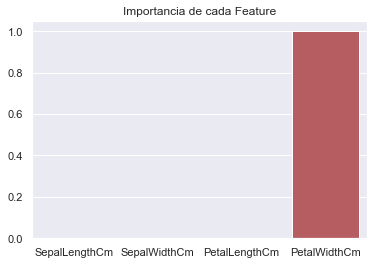

In [44]:
importances = tree.feature_importances_
columns = X.columns
sns.barplot(columns, importances)
plt.title('Importancia de cada Feature')
plt.show()

**Ejercicio**: predecir con el modelo las etiquetas en el conjunto de Train y de Test. ¿Cómo son las etiquetas?

In [45]:
# Predecimos sobre nuestro set de entrenamieto
y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = tree.predict(X_test)

**Ejercicio**: evaluar la performance del modelo.

In [46]:
# Comparamos con las etiquetas reales
from sklearn.metrics import accuracy_score

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.95
Accuracy sobre conjunto de Test: 0.98


**Ejercicio**: ¿Qué ocurre con el desempeño a medida que aumentan `max_depth`? Volver a correr todas las celdas, pero inicializando el `DecisionTreeClassifier` con valores más altos de max_depth.

**Ejercicio**: leer el código de la siguiente celda y tratar de entenderlo. Modificar `max_depth` y fijarse cómo se modifican las fronteras de decisión obtenidas.

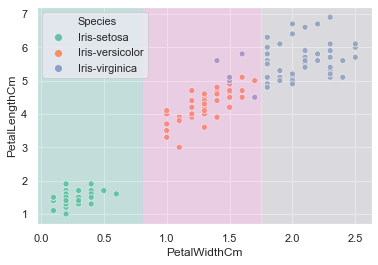

In [47]:
## Creamos el clasificador
clf = DecisionTreeClassifier(max_depth = 2)

# # Modificamos un poco los datos para poder graficar
y_train = y.map({'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2})

# Entrenamos
clf.fit(X[['PetalWidthCm', 'PetalLengthCm']], y_train)

# Graficamos los datos y las fronteras creadas
plt.figure()
ax = sns.scatterplot(X.PetalWidthCm, X.PetalLengthCm, hue=y, palette='Set2')

xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                      np.linspace(*ylim, num=200))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

contours = ax.contourf(xx, yy, Z, alpha=0.3, cmap = 'Set2')
plt.show()